In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = load_iris()
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [3]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [4]:
X = iris.data
y = iris.target
print(X.shape, y.shape)

(150, 4) (150,)


In [5]:
np.unique(y)

array([0, 1, 2])

In [6]:
mask = np.where((y==0)|(y==1))
X= X[mask][:,[0,2]]
y = y[mask]

In [7]:
print(np.unique(y))

[0 1]


In [8]:
print(X.shape, y.shape)

(100, 2) (100,)


In [9]:
setosas = X[np.where(y==0)]
versicolors = X[np.where(y==1)]

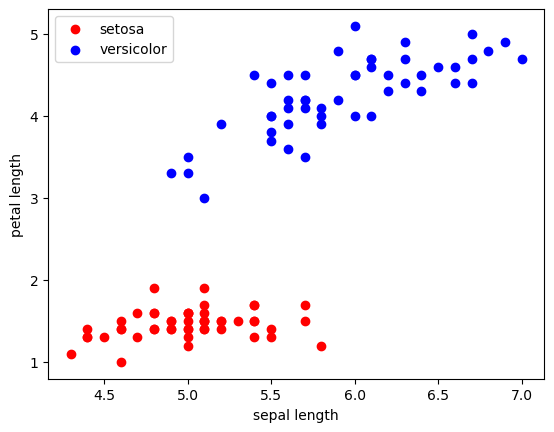

In [10]:
plt.scatter(setosas[:,0], setosas[:,1], color='r', label='setosa')
plt.scatter(versicolors[:,0], versicolors[:,1], color='b', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend()

In [11]:
print(X.shape, y.shape)

(100, 2) (100,)


In [12]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.25, shuffle=True)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(75, 2) (75,)
(25, 2) (25,)


In [24]:
import sys

class Perceptron(object):

  def __init__(self, input_dim):
    self.weights = np.random.normal(loc=0.0, scale=1.0, size=input_dim)
    self.bias = np.random.normal(loc=0.0, scale=1.0, size=1)

  def activation(self, pred):
    return np.where(pred >= 0, 1, 0)

  def predict(self, data):
    return self.activation(np.dot(data, self.weights.T) + self.bias)

  def accuracy(self, features, targets):
    predictions = self.predict(features)
    return (predictions == targets).mean()

  def train(self, xtrain, ytrain, xtest, ytest, epochs, lr=0.01):
    losses = []
    train_accuracies = []
    test_accuracies = []
    for e in range(1, epochs + 1):
      epoch_loss = 0
      predictions = []
      for data, target in zip(xtrain, ytrain):
        pred = self.predict(data)
        error = target - pred
        update = lr * error
        epoch_loss += error ** 2
        self.weights += update * data
        self.bias += update
        
      train_acc = self.accuracy(xtrain, ytrain)
      test_acc = self.accuracy(xtest, ytest)
      train_accuracies.append(train_acc)
      test_accuracies.append(test_acc)
      losses.append(epoch_loss)

      print(f"\rEpoch {e}/{epochs}, Loss : {epoch_loss}, Train Acc : {train_acc}, Test Acc : {test_acc}", end="")
      sys.stdout.flush()

    return {'losses': losses, 'train_acc': train_accuracies, 'test_acc': test_accuracies}

In [25]:
p = Perceptron(input_dim=2)
history = p.train(X_train,y_train, X_test, y_test, epochs=350, lr=0.001)

Epoch 350/350, Loss : [0], Train Acc : 1.0, Test Acc : 0.96est Acc : 0.968

In [18]:
print(p.weights, p.bias)

[ 0.06186695 -0.39976024] [-0.49574466]


Text(0, 0.5, 'accuracy')

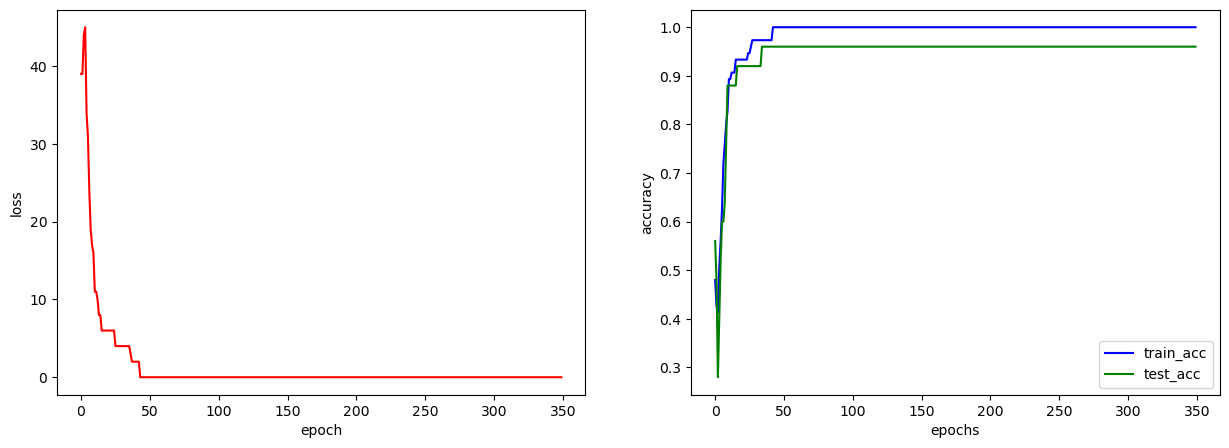

In [26]:
fig = plt.figure(figsize=[15,5])

ax1 = fig.add_subplot(121)
ax1.plot(history['losses'], c='r')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')

ax2 = fig.add_subplot(122)
ax2.plot(history['train_acc'], c='b', label='train_acc')
ax2.plot(history['test_acc'], c='g', label='test_acc')
ax2.legend()
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')


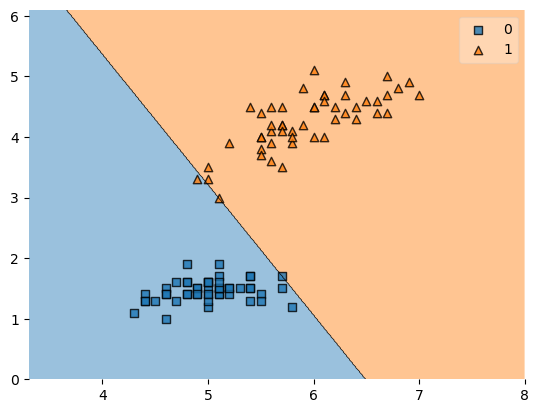

In [29]:
from mlxtend.plotting import plot_decision_regions
_ = plot_decision_regions(X,y, clf=p)